# Bike Sharing Assignment

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Objective:
- We need to create a linear model hat describes the effect of various features on demand.
- the model should be interpretable so that the management can understand it. 

## Steps to build a model:

- Reading, understanding and visualising the data
- Preparing the data for modelling(train-test split, rescalling etc.)
- train the model (we ll learn the coeff and intrcepts, selecting the right variables, removing multicolinearity)
- Residual analysis
- Predictions and evaluations on the test set

## Reading, Understanding and Visualising the data

### Loading the Dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#load the dataset
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Data Understanding/Cleaning
**Inspecting the various aspects of bike dataset**

In [3]:
#finding the shape of the dataset
bike.shape

(730, 16)

**Checking for any missing value and datatype of all the columns**

In [4]:
#check for any missing value and datatype of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**From the above, it is clear that there are no missing value and datatype of the variable also seems proper.**

In [5]:
#statistical summary of all the numerical variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Identifying the categorical and continous features**<br>
Understanding the column variables:<br>
instant: its a counter that represents every row<br>
dteday: are the dates<br>
season: season is derived from date. it has 4 values and this is a categorical variable.<br>
yr: year is the binary field represents 0: 2018, 1:2019<br>
mnth: month is a categorical column<br>
holiday: binary field; 0: not a holiday, 1: a holiday<br>
weekday: its also a categorical field<br>
workingday: binary number, 0 - not a working day, 1 - working day<br>
weathersit: its a categorical column.<br>
temp & atemp: both of these columns are date variables<br>
hum, windspeed are the numerical columns<br>
casual and registered: these are the variables that count casual and registered users<br>
cnt: no. of people rented bikes<br>
<br>
From the above columns, season, mnth, weekday, weathersit are the categorical variables.

**Drop the unnecessary variables**<br>
We are not analysing the data based on casual and registered users <br>
Here, we are strongly analysing the best predictors i.e. on which weather, day, weekend, the most demand is there.<br>
Also,the instant column is just a counter<br>
and dteday column wont add much value to our analysis as its just a number and other columns have data extracted from date<br>
<br>
So, we can drop casual, registered, instant, dteday columns from our dataset.

In [6]:
#Dropping the above columns
bike = bike.drop(['instant','dteday','casual','registered'], axis = 1)

**Checking for missing variables**

In [7]:
# We already saw from bank.info(), there are no missing values. To doubly sure checking the percentage of missing values
round(100*(bike.isnull().sum()/len(bike)),2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

There are no missing values in the dataset.

In [8]:
print(bike.shape)
bike.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**For our prediction, cnt is the target variable**

###  Data Visualisation

Now that we have read and inspected the data, let’s move on to visualising it. This will help us in interpreting the data well and identifying the variables that can turn out to be useful in building the model.

**Visualising Categorical Variables**

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

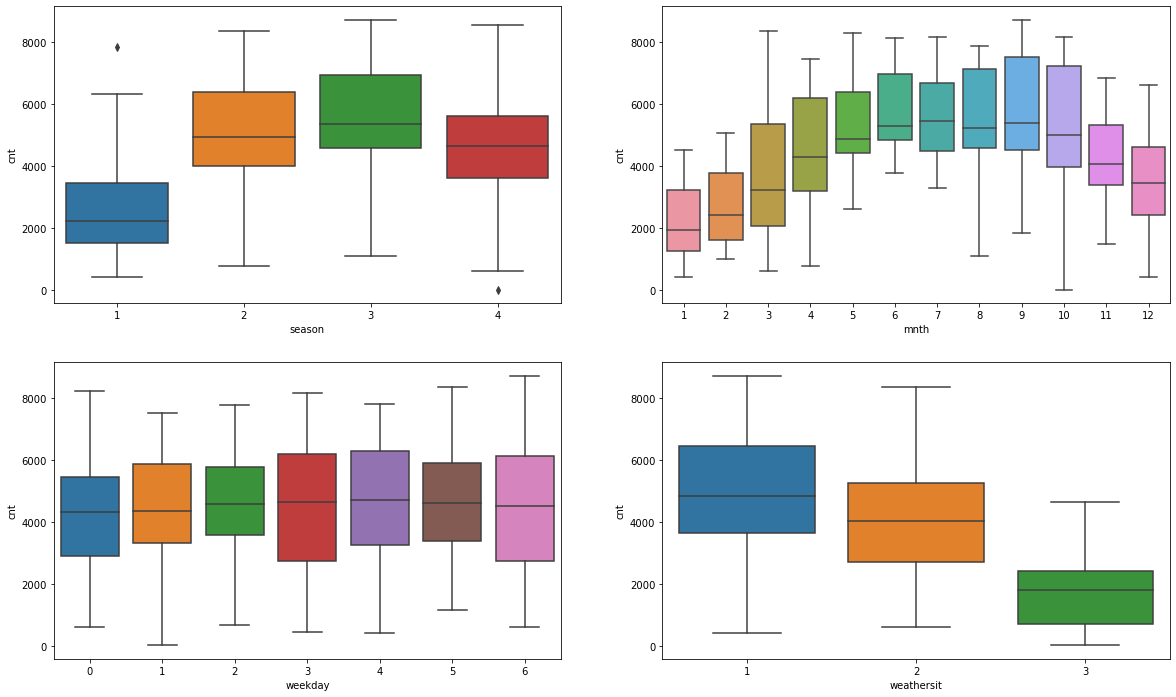

In [9]:
#Let's make a boxplot for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

##  Preparing the Data for Modelling
### Create Dummy Variables for all the Categorical variables

**Hot encoding for Nominal Categorical data**
We will create dummy variables for 4 categorical variables season, mnth, weekday, weathersit.

In [10]:
# Convert to categorical column to category datatype

bike['season']=bike['season'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [11]:
#Renaming the type of variables
bike['season'] = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike['mnth'] = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weekday'] = bike.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bike['weathersit'] = bike.weathersit.map({1:'weathersit1', 2:'weathersit2', 3:'weathersit3'})

**Making dummy variables for season column**

In [12]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(bike['season'])
#checking what the dataset season lookslike
season

,Spring,Summer,Fall,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [13]:
# Let's drop the first column from season df using 'drop_first = True'
season = pd.get_dummies(bike['season'], drop_first = True)

In [14]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, season], axis = 1)

In [15]:
# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter
0,Spring,0,Jan,0,Saturday,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,Spring,0,Jan,0,Sunday,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,Spring,0,Jan,0,Monday,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,Spring,0,Jan,0,Tuesday,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,Spring,0,Jan,0,Wednesday,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [16]:
# Drop 'season' as we have created the dummies for it
bike.drop(['season'], axis = 1, inplace = True)

In [17]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter
0,0,Jan,0,Saturday,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,Jan,0,Sunday,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,Jan,0,Monday,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,Jan,0,Tuesday,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,Jan,0,Wednesday,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


**Making dummy variables for mnth column**

In [18]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(bike['mnth'])
#checking what the dataset mnth lookslike
month

,Jan,Feb,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, month], axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec
0,0,Jan,0,Saturday,0,weathersit2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,Jan,0,Sunday,0,weathersit2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,Jan,0,Monday,1,weathersit1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,Jan,0,Tuesday,1,weathersit1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,Jan,0,Wednesday,1,weathersit1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Drop 'mnth' as we have created the dummies for it
bike.drop(['mnth'], axis = 1, inplace = True)

In [21]:
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Mar,Apr,May,June,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,Saturday,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,Sunday,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,Monday,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Tuesday,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Wednesday,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


**Making dummy variables for weekday column**

In [22]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weeks'
weeks = pd.get_dummies(bike['weekday'])
#checking what the dataset weeks lookslikeweeks
weeks

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,0,0,0,0,0,1,0
727,0,0,0,0,0,0,1
728,1,0,0,0,0,0,0


In [23]:
# Let's drop the first column from weekday df using 'drop_first = True'
weeks = pd.get_dummies(bike['weekday'], drop_first = True)

In [24]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weeks], axis = 1)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,Saturday,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,1
1,0,0,Sunday,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,Monday,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,Wednesday,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Drop 'weekday' as we have created the dummies for it
bike.drop(['weekday'], axis = 1, inplace = True)

In [26]:
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


**Making dummy variables for weathersit column**

In [27]:
bike.weathersit.value_counts()

weathersit1    463
weathersit2    246
weathersit3     21
Name: weathersit, dtype: int64

In [28]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bike['weathersit'])
#checking what the dataset season lookslike
weather

,weathersit1,weathersit2,weathersit3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [29]:
# Let's drop the first column from weathersit df using 'drop_first = True'
weather = pd.get_dummies(bike['weathersit'], drop_first = True)

In [30]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weather], axis = 1)
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
0,0,0,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# Drop 'weathersit' as we have created the dummies for it
bike.drop(['weathersit'], axis = 1, inplace = True)

In [32]:
# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
bike.shape

(730, 31)

### Splitting the data to train and test sets
The first basic step for regression is performing a train-test split.

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescalling the features
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. <br>
we will use MinMax scaling.

In [35]:
scaler = MinMaxScaler()

In [36]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


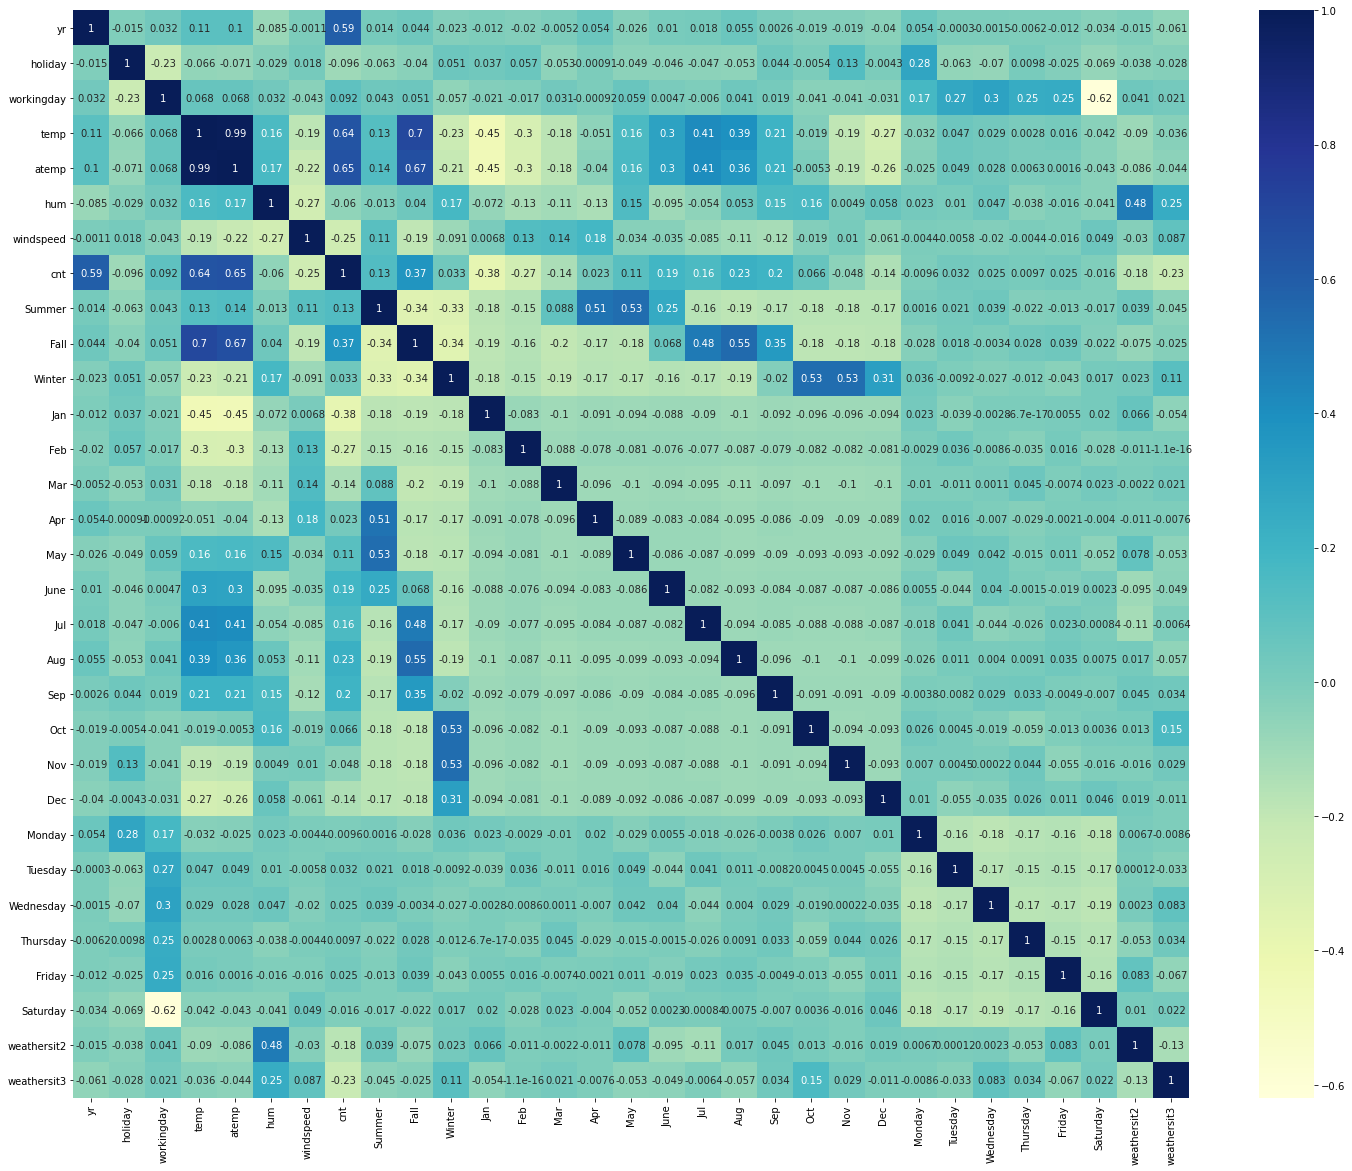

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

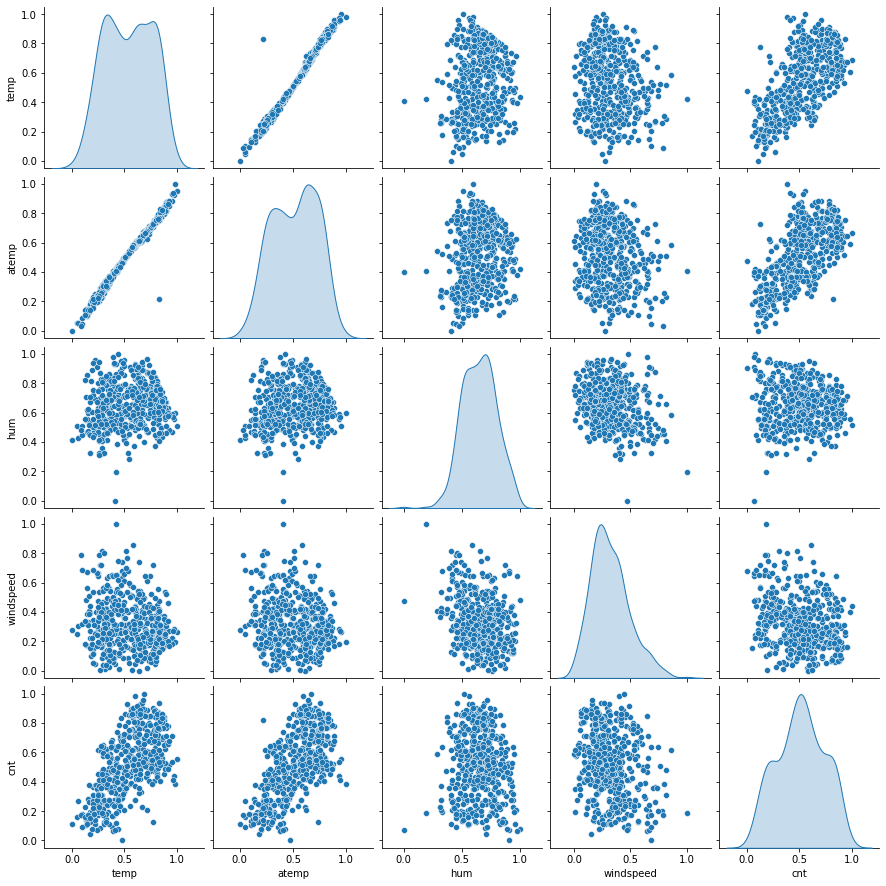

In [40]:
#check pairplot for numeric variables

num_val=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(num_val, diag_kind='kde')
plt.show()

From the above pair plot, there seems to be a linear relation between temp and cnt

###  Dividing the data into X and y

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the Model

**Use RFE to find top 15 predictors**

In [42]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('Jan', True, 1),
 ('Feb', False, 4),
 ('Mar', False, 12),
 ('Apr', False, 13),
 ('May', False, 6),
 ('June', False, 14),
 ('Jul', True, 1),
 ('Aug', False, 7),
 ('Sep', True, 1),
 ('Oct', False, 11),
 ('Nov', False, 2),
 ('Dec', False, 3),
 ('Monday', False, 8),
 ('Tuesday', False, 9),
 ('Wednesday', False, 15),
 ('Thursday', False, 16),
 ('Friday', False, 10),
 ('Saturday', True, 1),
 ('weathersit2', True, 1),
 ('weathersit3', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Fall', 'Winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'weathersit2',
       'weathersit3'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Aug', 'Oct', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.83
4,hum,20.38
7,Fall,7.26
2,workingday,5.10
5,windspeed,3.89
6,Summer,3.62
8,Winter,2.90
13,weathersit2,2.15
0,yr,2.06
12,Saturday,1.92


In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        21:51:30   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2002      0.030      6.747      

Jan is insignificant in presence of other variables; can be dropped, can be dropped.

In [51]:
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

Rebuilding the model without `Jan`

In [52]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [53]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.13e-191
Time:                        21:51:30   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1839      0.029      6.433      

In [55]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Summer', 'Fall', 'Winter', 'Jul', 'Sep', 'Saturday', 'weathersit2',
       'weathersit3'],
      dtype='object')

In [56]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.62
4,hum,17.47
7,Fall,7.16
2,workingday,5.02
5,windspeed,3.88
6,Summer,3.40
8,Winter,2.51
12,weathersit2,2.13
0,yr,2.04
11,Saturday,1.90


In [105]:
#lets drop the col 'hum' as temp can be related to bike rental buisness

In [59]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without hum

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [61]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.73e-189
Time:                        21:51:31   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0924      0.019      4.803      

In [63]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Summer', 'Fall',
       'Winter', 'Jul', 'Sep', 'Saturday', 'weathersit2', 'weathersit3'],
      dtype='object')

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,16.45
6,Fall,6.86
2,workingday,4.41
4,windspeed,3.71
5,Summer,3.36
7,Winter,2.43
0,yr,2.04
10,Saturday,1.77
8,Jul,1.60
11,weathersit2,1.54


In [66]:
#Lets drop Fall as it has high vif value
X_train_new = X_train_new.drop(['Fall'], axis=1)

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(y_train,X_train_lm).fit()  

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.92e-188
Time:                        21:51:31   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0818      0.019      4.280      

In [70]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter',
       'Jul', 'Sep', 'Saturday', 'weathersit2', 'weathersit3'],
      dtype='object')

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.47
2,workingday,4.38
4,windspeed,3.57
0,yr,2.02
9,Saturday,1.77
5,Summer,1.75
10,weathersit2,1.54
7,Jul,1.53
6,Winter,1.49
8,Sep,1.29


In [74]:
#drop July as it contains high p value
X_train_new = X_train_new.drop(['Jul'], axis=1)

In [75]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [77]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.92e-188
Time:                        21:51:50   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0849      0.019      4.443      

In [78]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter',
       'Sep', 'Saturday', 'weathersit2', 'weathersit3'],
      dtype='object')

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,yr,2.02
8,Saturday,1.76
5,Summer,1.57
9,weathersit2,1.53
6,Winter,1.42
7,Sep,1.21
1,holiday,1.12


In [82]:
#drop holiday as it contains high p-value
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [83]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [84]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [85]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.47e-188
Time:                        21:54:00   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0753      0.019      4.051      

In [86]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter', 'Sep',
       'Saturday', 'weathersit2', 'weathersit3'],
      dtype='object')

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,Summer,1.57
8,weathersit2,1.53
5,Winter,1.40
6,Sep,1.20
9,weathersit3,1.08


In this model, there seem to be very low multicollinearity between the predictor variables.

### Residual Analysis of the train data
check if the error terms are also normally distributed.<br>
let us plot the histogram of the error terms 

In [88]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

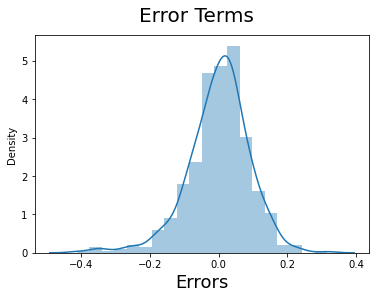

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

### Model Interpretation

Hypothesis Testing:
Ho = all coefficients are zero
H1 = atleast one of the coefficients is not 0.

But from the above OLS regression results, the coefficients are not zero.
Therefore, we reject the Null Hypothesis.

### Validate Assumptions
- 	Error terms are normally distributed with mean zero (not X, Y) (from residual analysis)
- 	There is No Multicollinearity between the predictor variables 
-	There is a linear relationship between X and Y (from pair plot i.e. between temp and cnt)


### Making Predictions

#### Applying the scaling on the test sets

In [90]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [91]:

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weathersit2,weathersit3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [93]:
y_test = df_test.pop('cnt')
X_test = df_test

In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [95]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

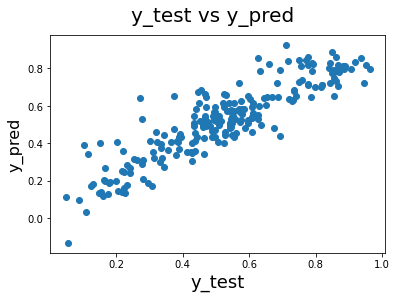

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

We can see that the equation of our best fitted line is:<br>
cnt = 0.0753+ (0.2331 x yr) + (0.0563 x workingday) + (0.5499 x temp) - (0.1552 x windspeed) + (0.0874 x Summer) + (0.1318 x Winter) + (0.0972 x Sep) +(0.0677 x Saturday) - (0.0813 x weathersit2) - (0.2880 x weathersit3)

### R2 value for test

In [100]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7955844377237248


In [98]:
#shape of X_test
X_test.shape

(219, 30)

In [101]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) 
p = X_test.shape[1]

#Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7629649331051702

As per our model, the top 3 influencers for booking bike are : <br>
temp(temperature): a unit increase in temp variable increases the bike hire number by 0.5499 units.<br>
weathersit3:  weathersit3 i.e. (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) affects the booking of bikes.A unit increase in weathersit3 variable increases the bike hire by 0.2880 units.<br>
yr (year): A unit increase in yr variable increases the bike hire by 0.2331 units. This seems that as the year increases, the demand for bike hire also increasing.